In [3]:
import pandas as pd

# Beispielpfade für Train-, Test-, und Validierungsdatensätze für alle vier Kategorien
base_path = 'data_10x/splitted_datasets'
#precision = 'allele' #allele or gene

# Definierte Pfade für alle vier Kategorien
datasets = {
    "paired_gene": {
        "train": f"{base_path}/gene/paired/train.tsv",
        "test": f"{base_path}/gene/paired/test.tsv",
        "validation": f"{base_path}/gene/paired/validation.tsv"
    },
    "paired_allele": {
        "train": f"{base_path}/allele/paired/train.tsv",
        "test": f"{base_path}/allele/paired/test.tsv",
        "validation": f"{base_path}/allele/paired/validation.tsv"
    },
    "beta_gene": {
        "train": f"{base_path}/gene/beta/train.tsv",
        "test": f"{base_path}/gene/beta/test.tsv",
        "validation": f"{base_path}/gene/beta/validation.tsv"
    },
    "beta_allele": {
        "train": f"{base_path}/allele/beta/train.tsv",
        "test": f"{base_path}/allele/beta/test.tsv",
        "validation": f"{base_path}/allele/beta/validation.tsv"
    }
}

# Berechnung der Anzahl der Zeilen für jedes Set
results = {}
for dataset_name, paths in datasets.items():
    # Daten laden
    train_df = pd.read_csv(paths["train"], sep='\t')
    test_df = pd.read_csv(paths["test"], sep='\t')
    validation_df = pd.read_csv(paths["validation"], sep='\t')
    
    # Anzahl der Zeilen berechnen
    train_length = len(train_df)
    test_length = len(test_df)
    validation_length = len(validation_df)
    total_length = train_length + test_length + validation_length
    
    # Zähle die Anzahl der Bindings 1 und 0 in jedem Datensatz
    train_binding_counts = train_df['Binding'].value_counts()
    test_binding_counts = test_df['Binding'].value_counts()
    validation_binding_counts = validation_df['Binding'].value_counts()
    
    # Zähle die Anzahl der TPP1, TPP2, TPP3 Einträge in jedem Datensatz
    train_task_counts = train_df['task'].value_counts()
    test_task_counts = test_df['task'].value_counts()
    validation_task_counts = validation_df['task'].value_counts()

    # Ergebnisse speichern
    results[dataset_name] = {
        "Train": train_length,
        "Train_Binding_1": train_binding_counts.get(1, 0),
        "Train_Binding_0": train_binding_counts.get(0, 0),
        "Train_TPP1": train_task_counts.get("TPP1", 0),
        "Train_TPP2": train_task_counts.get("TPP2", 0),
        "Train_TPP3": train_task_counts.get("TPP3", 0),
        "Train_TPP4": train_task_counts.get("TPP4", 0),
        "Test": test_length,
        "Test_Binding_1": test_binding_counts.get(1, 0),
        "Test_Binding_0": test_binding_counts.get(0, 0),
        "Test_TPP1": test_task_counts.get("TPP1", 0),
        "Test_TPP2": test_task_counts.get("TPP2", 0),
        "Test_TPP3": test_task_counts.get("TPP3", 0),
        "Test_TPP4": test_task_counts.get("TPP4", 0),
        "Validation": validation_length,
        "Validation_Binding_1": validation_binding_counts.get(1, 0),
        "Validation_Binding_0": validation_binding_counts.get(0, 0),
        "Validation_TPP1": validation_task_counts.get("TPP1", 0),
        "Validation_TPP2": validation_task_counts.get("TPP2", 0),
        "Validation_TPP3": validation_task_counts.get("TPP3", 0),
        "Validation_TPP4": validation_task_counts.get("TPP4", 0),
        "Total": total_length
    }

# Ergebnisse anzeigen
for dataset, lengths in results.items():
    print(f'--- {dataset.replace("_", " ").title()} ---')
    print(f'Anzahl der Zeilen im Trainingsdatensatz: {lengths["Train"]} (Binding=1: {lengths["Train_Binding_1"]}, Binding=0: {lengths["Train_Binding_0"]}, TPP1: {lengths["Train_TPP1"]}, TPP2: {lengths["Train_TPP2"]}, TPP3: {lengths["Train_TPP3"]})')
    print(f'Anzahl der Zeilen im Testdatensatz: {lengths["Test"]} (Binding=1: {lengths["Test_Binding_1"]}, Binding=0: {lengths["Test_Binding_0"]}, TPP1: {lengths["Test_TPP1"]}, TPP2: {lengths["Test_TPP2"]}, TPP3: {lengths["Test_TPP3"]})')
    print(f'Anzahl der Zeilen im Validierungsdatensatz: {lengths["Validation"]} (Binding=1: {lengths["Validation_Binding_1"]}, Binding=0: {lengths["Validation_Binding_0"]}, TPP1: {lengths["Validation_TPP1"]}, TPP2: {lengths["Validation_TPP2"]}, TPP3: {lengths["Validation_TPP3"]})')
    print(f'Gesamtanzahl der Zeilen (Train + Test + Validation): {lengths["Total"]}\n')

--- Paired Gene ---
Anzahl der Zeilen im Trainingsdatensatz: 67405 (Binding=1: 33711, Binding=0: 33694, TPP1: 0, TPP2: 0, TPP3: 0)
Anzahl der Zeilen im Testdatensatz: 43118 (Binding=1: 7226, Binding=0: 35892, TPP1: 22482, TPP2: 19586, TPP3: 729)
Anzahl der Zeilen im Validierungsdatensatz: 43111 (Binding=1: 7224, Binding=0: 35887, TPP1: 0, TPP2: 0, TPP3: 0)
Gesamtanzahl der Zeilen (Train + Test + Validation): 153634

--- Paired Allele ---
Anzahl der Zeilen im Trainingsdatensatz: 73003 (Binding=1: 36515, Binding=0: 36488, TPP1: 0, TPP2: 0, TPP3: 0)
Anzahl der Zeilen im Testdatensatz: 46678 (Binding=1: 7826, Binding=0: 38852, TPP1: 28032, TPP2: 18426, TPP3: 140)
Anzahl der Zeilen im Validierungsdatensatz: 46681 (Binding=1: 7826, Binding=0: 38855, TPP1: 0, TPP2: 0, TPP3: 0)
Gesamtanzahl der Zeilen (Train + Test + Validation): 166362

--- Beta Gene ---
Anzahl der Zeilen im Trainingsdatensatz: 251485 (Binding=1: 125875, Binding=0: 125610, TPP1: 0, TPP2: 0, TPP3: 0)
Anzahl der Zeilen im Testd

### Anzahl Unique Epotope pro Files unabhängig der Binding

In [7]:
# Zusätzliche Analyse für einzigartige Epitope
unique_epitopes = {}

for dataset_name, paths in datasets.items():
    train_df = pd.read_csv(paths["train"], sep='\t')
    test_df = pd.read_csv(paths["test"], sep='\t')
    validation_df = pd.read_csv(paths["validation"], sep='\t')
    
    # Extrahieren einzigartiger Epitope
    train_unique = set(train_df["Epitope"].unique())
    test_unique = set(test_df["Epitope"].unique())
    validation_unique = set(validation_df["Epitope"].unique())
    
    # Gesamtanzahl einzigartiger Epitope
    all_unique = train_unique | test_unique | validation_unique  # Vereinigung der Sets

    # Ergebnisse speichern
    unique_epitopes[dataset_name] = {
        "Train_Unique": len(train_unique),
        "Test_Unique": len(test_unique),
        "Validation_Unique": len(validation_unique),
        "Total_Unique": len(all_unique),
        "Train_Epitopes": train_unique,
        "Test_Epitopes": test_unique,
        "Validation_Epitopes": validation_unique
    }

# Ergebnisse anzeigen
for dataset, epitopes in unique_epitopes.items():
    print(f'--- {dataset.replace("_", " ").title()} ---')
    print(f'Anzahl einzigartiger Epitope im Trainingsdatensatz: {epitopes["Train_Unique"]}')
    print(f'Anzahl einzigartiger Epitope im Testdatensatz: {epitopes["Test_Unique"]}')
    print(f'Anzahl einzigartiger Epitope im Validierungsdatensatz: {epitopes["Validation_Unique"]}')
    print(f'Gesamtanzahl einzigartiger Epitope (Train + Test + Validation): {epitopes["Total_Unique"]}\n')

print("############### Überlappungen zw. den Datensätzen - welche Files haben gleiche Epitope ###############")

for dataset, epitopes in unique_epitopes.items():
    overlap_train_test = len(epitopes["Train_Epitopes"] & epitopes["Test_Epitopes"])
    overlap_train_validation = len(epitopes["Train_Epitopes"] & epitopes["Validation_Epitopes"])
    overlap_test_validation = len(epitopes["Test_Epitopes"] & epitopes["Validation_Epitopes"])
    
    print(f'--- {dataset.replace("_", " ").title()} Overlaps ---')
    print(f'Überlappung zwischen Train und Test: {overlap_train_test}')
    print(f'Überlappung zwischen Train und Validation: {overlap_train_validation}')
    print(f'Überlappung zwischen Test und Validation: {overlap_test_validation}\n')


/tmp/ipykernel_115872/2672044272.py:5: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(paths["train"], sep='\t')
/tmp/ipykernel_115872/2672044272.py:5: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(paths["train"], sep='\t')


--- Paired Gene ---
Anzahl einzigartiger Epitope im Trainingsdatensatz: 694
Anzahl einzigartiger Epitope im Testdatensatz: 760
Anzahl einzigartiger Epitope im Validierungsdatensatz: 739
Gesamtanzahl einzigartiger Epitope (Train + Test + Validation): 1377

--- Paired Allele ---
Anzahl einzigartiger Epitope im Trainingsdatensatz: 1182
Anzahl einzigartiger Epitope im Testdatensatz: 564
Anzahl einzigartiger Epitope im Validierungsdatensatz: 573
Gesamtanzahl einzigartiger Epitope (Train + Test + Validation): 1377

--- Beta Gene ---
Anzahl einzigartiger Epitope im Trainingsdatensatz: 1105
Anzahl einzigartiger Epitope im Testdatensatz: 1169
Anzahl einzigartiger Epitope im Validierungsdatensatz: 1177
Gesamtanzahl einzigartiger Epitope (Train + Test + Validation): 1890

--- Beta Allele ---
Anzahl einzigartiger Epitope im Trainingsdatensatz: 1606
Anzahl einzigartiger Epitope im Testdatensatz: 1084
Anzahl einzigartiger Epitope im Validierungsdatensatz: 1089
Gesamtanzahl einzigartiger Epitope (Tra

### Anzahl Unique Epotope pro Files abhängig der Binding mit Original Data

In [9]:
# Anzahl der einzigartigen Epitope pro Binding und pro Datei
unique_epitopes_count = {}

for dataset, paths in datasets.items():
    train_df = pd.read_csv(paths["train"], sep='\t')
    test_df = pd.read_csv(paths["test"], sep='\t')
    validation_df = pd.read_csv(paths["validation"], sep='\t')
    
    # Einzigartige Epitope für Binding=0 und Binding=1
    train_unique = {
        0: len(set(train_df[train_df['Binding'] == 0]['Epitope'])),
        1: len(set(train_df[train_df['Binding'] == 1]['Epitope']))
    }
    test_unique = {
        0: len(set(test_df[test_df['Binding'] == 0]['Epitope'])),
        1: len(set(test_df[test_df['Binding'] == 1]['Epitope']))
    }
    validation_unique = {
        0: len(set(validation_df[validation_df['Binding'] == 0]['Epitope'])),
        1: len(set(validation_df[validation_df['Binding'] == 1]['Epitope']))
    }
    
    # Ergebnisse speichern
    unique_epitopes_count[dataset] = {
        "Train_Binding_0": train_unique[0],
        "Train_Binding_1": train_unique[1],
        "Test_Binding_0": test_unique[0],
        "Test_Binding_1": test_unique[1],
        "Validation_Binding_0": validation_unique[0],
        "Validation_Binding_1": validation_unique[1]
    }

# Ergebnisse ausgeben
for dataset, counts in unique_epitopes_count.items():
    print(f'--- {dataset.replace("_", " ").title()} Unique Epitope Counts ---')
    print(f'Train (Binding=0): {counts["Train_Binding_0"]}, Train (Binding=1): {counts["Train_Binding_1"]}')
    print(f'Test (Binding=0): {counts["Test_Binding_0"]}, Test (Binding=1): {counts["Test_Binding_1"]}')
    print(f'Validation (Binding=0): {counts["Validation_Binding_0"]}, Validation (Binding=1): {counts["Validation_Binding_1"]}\n')


/tmp/ipykernel_115872/3297729869.py:5: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(paths["train"], sep='\t')
/tmp/ipykernel_115872/3297729869.py:5: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(paths["train"], sep='\t')


--- Paired Gene Unique Epitope Counts ---
Train (Binding=0): 9, Train (Binding=1): 693
Test (Binding=0): 9, Test (Binding=1): 758
Validation (Binding=0): 9, Validation (Binding=1): 736

--- Paired Allele Unique Epitope Counts ---
Train (Binding=0): 9, Train (Binding=1): 1181
Test (Binding=0): 9, Test (Binding=1): 562
Validation (Binding=0): 9, Validation (Binding=1): 571

--- Beta Gene Unique Epitope Counts ---
Train (Binding=0): 9, Train (Binding=1): 1103
Test (Binding=0): 9, Test (Binding=1): 1168
Validation (Binding=0): 9, Validation (Binding=1): 1176

--- Beta Allele Unique Epitope Counts ---
Train (Binding=0): 9, Train (Binding=1): 1604
Test (Binding=0): 9, Test (Binding=1): 1083
Validation (Binding=0): 9, Validation (Binding=1): 1088



In [8]:
for dataset, paths in datasets.items():
    train_df = pd.read_csv(paths["train"], sep='\t')
    test_df = pd.read_csv(paths["test"], sep='\t')
    validation_df = pd.read_csv(paths["validation"], sep='\t')
    
    # Aufteilen der Epitope nach Binding-Wert (0 oder 1)
    train_epitopes_binding = {
        0: set(train_df[train_df['Binding'] == 0]['Epitope']),
        1: set(train_df[train_df['Binding'] == 1]['Epitope'])
    }
    test_epitopes_binding = {
        0: set(test_df[test_df['Binding'] == 0]['Epitope']),
        1: set(test_df[test_df['Binding'] == 1]['Epitope'])
    }
    validation_epitopes_binding = {
        0: set(validation_df[validation_df['Binding'] == 0]['Epitope']),
        1: set(validation_df[validation_df['Binding'] == 1]['Epitope'])
    }
    
    # Berechnung der Überlappung pro Binding-Wert
    for binding in [0, 1]:
        overlap_train_test = len(train_epitopes_binding[binding] & test_epitopes_binding[binding])
        overlap_train_validation = len(train_epitopes_binding[binding] & validation_epitopes_binding[binding])
        overlap_test_validation = len(test_epitopes_binding[binding] & validation_epitopes_binding[binding])
        
        print(f'--- {dataset.replace("_", " ").title()} Overlaps (Binding={binding}) ---')
        print(f'Überlappung zwischen Train und Test: {overlap_train_test}')
        print(f'Überlappung zwischen Train und Validation: {overlap_train_validation}')
        print(f'Überlappung zwischen Test und Validation: {overlap_test_validation}\n')


--- Paired Gene Overlaps (Binding=0) ---
Überlappung zwischen Train und Test: 9
Überlappung zwischen Train und Validation: 9
Überlappung zwischen Test und Validation: 9

--- Paired Gene Overlaps (Binding=1) ---
Überlappung zwischen Train und Test: 290
Überlappung zwischen Train und Validation: 295
Überlappung zwischen Test und Validation: 427

--- Paired Allele Overlaps (Binding=0) ---
Überlappung zwischen Train und Test: 9
Überlappung zwischen Train und Validation: 9
Überlappung zwischen Test und Validation: 9

--- Paired Allele Overlaps (Binding=1) ---
Überlappung zwischen Train und Test: 443
Überlappung zwischen Train und Validation: 445
Überlappung zwischen Test und Validation: 315



/tmp/ipykernel_115872/719111292.py:2: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(paths["train"], sep='\t')


--- Beta Gene Overlaps (Binding=0) ---
Überlappung zwischen Train und Test: 9
Überlappung zwischen Train und Validation: 9
Überlappung zwischen Test und Validation: 9

--- Beta Gene Overlaps (Binding=1) ---
Überlappung zwischen Train und Test: 631
Überlappung zwischen Train und Validation: 625
Überlappung zwischen Test und Validation: 770



/tmp/ipykernel_115872/719111292.py:2: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(paths["train"], sep='\t')


--- Beta Allele Overlaps (Binding=0) ---
Überlappung zwischen Train und Test: 9
Überlappung zwischen Train und Validation: 9
Überlappung zwischen Test und Validation: 9

--- Beta Allele Overlaps (Binding=1) ---
Überlappung zwischen Train und Test: 888
Überlappung zwischen Train und Validation: 887
Überlappung zwischen Test und Validation: 726



### Anzahl Unique Epotope pro Files abhängig der Binding mit Mixed Data

In [13]:
# Anzahl der einzigartigen Epitope pro Binding und pro Datei
unique_epitopes_count = {}

for dataset, paths in datasets.items():
    train_df = pd.read_csv(paths["train"], sep='\t')
    test_df = pd.read_csv(paths["test"], sep='\t')
    validation_df = pd.read_csv(paths["validation"], sep='\t')
    
    # Einzigartige Epitope für Binding=0 und Binding=1
    train_unique = {
        0: len(set(train_df[train_df['Binding'] == 0]['Epitope'])),
        1: len(set(train_df[train_df['Binding'] == 1]['Epitope']))
    }
    test_unique = {
        0: len(set(test_df[test_df['Binding'] == 0]['Epitope'])),
        1: len(set(test_df[test_df['Binding'] == 1]['Epitope']))
    }
    validation_unique = {
        0: len(set(validation_df[validation_df['Binding'] == 0]['Epitope'])),
        1: len(set(validation_df[validation_df['Binding'] == 1]['Epitope']))
    }
    
    # Ergebnisse speichern
    unique_epitopes_count[dataset] = {
        "Train_Binding_0": train_unique[0],
        "Train_Binding_1": train_unique[1],
        "Test_Binding_0": test_unique[0],
        "Test_Binding_1": test_unique[1],
        "Validation_Binding_0": validation_unique[0],
        "Validation_Binding_1": validation_unique[1]
    }

# Ergebnisse ausgeben
for dataset, counts in unique_epitopes_count.items():
    print(f'--- {dataset.replace("_", " ").title()} Unique Epitope Counts ---')
    print(f'Train (Binding=0): {counts["Train_Binding_0"]}, Train (Binding=1): {counts["Train_Binding_1"]}')
    print(f'Test (Binding=0): {counts["Test_Binding_0"]}, Test (Binding=1): {counts["Test_Binding_1"]}')
    print(f'Validation (Binding=0): {counts["Validation_Binding_0"]}, Validation (Binding=1): {counts["Validation_Binding_1"]}\n')


--- Paired Gene Unique Epitope Counts ---
Train (Binding=0): 607, Train (Binding=1): 693
Test (Binding=0): 374, Test (Binding=1): 758
Validation (Binding=0): 383, Validation (Binding=1): 736

--- Paired Allele Unique Epitope Counts ---
Train (Binding=0): 622, Train (Binding=1): 1181
Test (Binding=0): 374, Test (Binding=1): 562
Validation (Binding=0): 383, Validation (Binding=1): 571

--- Beta Gene Unique Epitope Counts ---
Train (Binding=0): 947, Train (Binding=1): 1103
Test (Binding=0): 779, Test (Binding=1): 1168
Validation (Binding=0): 799, Validation (Binding=1): 1176

--- Beta Allele Unique Epitope Counts ---
Train (Binding=0): 975, Train (Binding=1): 1604
Test (Binding=0): 779, Test (Binding=1): 1083
Validation (Binding=0): 799, Validation (Binding=1): 1088



### Anzahl Unique Epotope pro Files abhängig der Binding mit allen Rows von 10X und BA aufgefüllt

In [1]:
import pandas as pd

# Beispielpfade für Train-, Test-, und Validierungsdatensätze für alle vier Kategorien
base_path = 'data_10x/splitted_datasets'
precision = 'allele' #allele or gene

# Definierte Pfade für alle vier Kategorien
datasets = {
    "paired_gene": {
        "train": f"{base_path}/gene/paired/train.tsv",
        "test": f"{base_path}/gene/paired/test.tsv",
        "validation": f"{base_path}/gene/paired/validation.tsv"
    },
    "paired_allele": {
        "train": f"{base_path}/allele/paired/train.tsv",
        "test": f"{base_path}/allele/paired/test.tsv",
        "validation": f"{base_path}/allele/paired/validation.tsv"
    },
    "beta_gene": {
        "train": f"{base_path}/gene/beta/train.tsv",
        "test": f"{base_path}/gene/beta/test.tsv",
        "validation": f"{base_path}/gene/beta/validation.tsv"
    },
    "beta_allele": {
        "train": f"{base_path}/allele/beta/train.tsv",
        "test": f"{base_path}/allele/beta/test.tsv",
        "validation": f"{base_path}/allele/beta/validation.tsv"
    }
}
# Anzahl der einzigartigen Epitope pro Binding und pro Datei
unique_epitopes_count = {}

for dataset, paths in datasets.items():
    train_df = pd.read_csv(paths["train"], sep='\t')
    test_df = pd.read_csv(paths["test"], sep='\t')
    validation_df = pd.read_csv(paths["validation"], sep='\t')
    
    # Einzigartige Epitope für Binding=0 und Binding=1
    train_unique = {
        0: len(set(train_df[train_df['Binding'] == 0]['Epitope'])),
        1: len(set(train_df[train_df['Binding'] == 1]['Epitope']))
    }
    test_unique = {
        0: len(set(test_df[test_df['Binding'] == 0]['Epitope'])),
        1: len(set(test_df[test_df['Binding'] == 1]['Epitope']))
    }
    validation_unique = {
        0: len(set(validation_df[validation_df['Binding'] == 0]['Epitope'])),
        1: len(set(validation_df[validation_df['Binding'] == 1]['Epitope']))
    }
    
    # Ergebnisse speichern
    unique_epitopes_count[dataset] = {
        "Train_Binding_0": train_unique[0],
        "Train_Binding_1": train_unique[1],
        "Test_Binding_0": test_unique[0],
        "Test_Binding_1": test_unique[1],
        "Validation_Binding_0": validation_unique[0],
        "Validation_Binding_1": validation_unique[1]
    }

# Ergebnisse ausgeben
for dataset, counts in unique_epitopes_count.items():
    print(f'--- {dataset.replace("_", " ").title()} Unique Epitope Counts ---')
    print(f'Train (Binding=0): {counts["Train_Binding_0"]}, Train (Binding=1): {counts["Train_Binding_1"]}')
    print(f'Test (Binding=0): {counts["Test_Binding_0"]}, Test (Binding=1): {counts["Test_Binding_1"]}')
    print(f'Validation (Binding=0): {counts["Validation_Binding_0"]}, Validation (Binding=1): {counts["Validation_Binding_1"]}\n')


--- Paired Gene Unique Epitope Counts ---
Train (Binding=0): 393, Train (Binding=1): 693
Test (Binding=0): 516, Test (Binding=1): 758
Validation (Binding=0): 483, Validation (Binding=1): 736

--- Paired Allele Unique Epitope Counts ---
Train (Binding=0): 670, Train (Binding=1): 1181
Test (Binding=0): 391, Test (Binding=1): 562
Validation (Binding=0): 397, Validation (Binding=1): 571

--- Beta Gene Unique Epitope Counts ---
Train (Binding=0): 746, Train (Binding=1): 1103
Test (Binding=0): 843, Test (Binding=1): 1168
Validation (Binding=0): 869, Validation (Binding=1): 1176

--- Beta Allele Unique Epitope Counts ---
Train (Binding=0): 986, Train (Binding=1): 1604
Test (Binding=0): 787, Test (Binding=1): 1083
Validation (Binding=0): 810, Validation (Binding=1): 1088



### Anzahl TPPs in Mixed

In [18]:
import pandas as pd

precision = "gene"

splitted_data_path = f"data_10x/splitted_datasets/{precision}/paired"  # paired oder beta

train_file_name = 'train.tsv'
test_file_name = 'test.tsv'
validation_file_name = 'validation.tsv'

train_file = f"{splitted_data_path}/{train_file_name}"
test_file = f"{splitted_data_path}/{test_file_name}"
validation_file = f"{splitted_data_path}/{validation_file_name}"

# Dateien einlesen
df_train = pd.read_csv(train_file, sep="\t")
df_test = pd.read_csv(test_file, sep="\t")
df_validate = pd.read_csv(validation_file, sep="\t")

# Sicherstellen, dass die notwendigen Spalten vorhanden sind
required_columns = ['TRA_CDR3', 'TRB_CDR3', 'Epitope']
for name, df in [("Train", df_train), ("Validate", df_validate), ("Test", df_test)]:
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        print(f"Fehlende Spalten in {name}-DataFrame: {missing_columns}")
        raise ValueError(f"DataFrame {name} hat nicht alle benötigten Spalten!")

# Training und Validation kombinieren
df_train_validate = pd.concat([df_train, df_validate])

# CDR3- und Epitope-Schlüssel erstellen
tcr_key = "tcr_key"
df_train_validate[tcr_key] = df_train_validate['TRA_CDR3'].astype(str) + '_' + df_train_validate['TRB_CDR3'].astype(str)
df_test[tcr_key] = df_test['TRA_CDR3'].astype(str) + '_' + df_test['TRB_CDR3'].astype(str)
df_train[tcr_key] = df_train['TRA_CDR3'].astype(str) + '_' + df_train['TRB_CDR3'].astype(str)
df_validate[tcr_key] = df_validate['TRA_CDR3'].astype(str) + '_' + df_validate['TRB_CDR3'].astype(str)

# Sets für Lookup erstellen
epitopes_in_train = set(df_train_validate['Epitope'])
cdr3_in_train = set(df_train_validate[tcr_key])

# Funktion zur Klassifizierung
def classify_task(row, epitopes_in_train, cdr3_in_train):
    epitope_exists = row['Epitope'] in epitopes_in_train
    cdr3_exists = row[tcr_key] in cdr3_in_train
    
    if epitope_exists and cdr3_exists:
        return 'TPP1'
    elif epitope_exists and not cdr3_exists:
        return 'TPP2'
    elif not epitope_exists and not cdr3_exists:
        return 'TPP3'
    elif not epitope_exists and cdr3_exists:
        return 'TPP4'

# Klassifizierung auf alle Datensätze anwenden
df_train['task'] = df_train.apply(classify_task, axis=1, args=(epitopes_in_train, cdr3_in_train))
df_validate['task'] = df_validate.apply(classify_task, axis=1, args=(epitopes_in_train, cdr3_in_train))
df_test['task'] = df_test.apply(classify_task, axis=1, args=(epitopes_in_train, cdr3_in_train))

# Anzahl der Tasks berechnen
task_counts_train = df_train['task'].value_counts()
task_counts_validate = df_validate['task'].value_counts()
task_counts_test = df_test['task'].value_counts()

# Ergebnisse ausgeben
print(precision)
print("Train data:")
print(task_counts_train)
print("\nValidation data:")
print(task_counts_validate)
print("\nTest data:")
print(task_counts_test)


gene
Train data:
task
TPP1    61498
Name: count, dtype: int64

Validation data:
task
TPP1    36934
Name: count, dtype: int64

Test data:
task
TPP1    24419
TPP2    12164
TPP4      136
TPP3       87
Name: count, dtype: int64


In [22]:
import pandas as pd

precision = "gene"
pipeline_data = './../../BA/BA_ZHAW/data'
pipeline_data_splitted = f'{pipeline_data}/splitted_datasets'

splitted_data_path = f"{pipeline_data_splitted}/{precision}/paired"  # paired oder beta

train_file_name = 'train.tsv'
test_file_name = 'test.tsv'
validation_file_name = 'validation.tsv'

train_file = f"{splitted_data_path}/{train_file_name}"
test_file = f"{splitted_data_path}/{test_file_name}"
validation_file = f"{splitted_data_path}/{validation_file_name}"

# Dateien einlesen
df_train = pd.read_csv(train_file, sep="\t")
df_test = pd.read_csv(test_file, sep="\t")
df_validate = pd.read_csv(validation_file, sep="\t")

# Sicherstellen, dass die notwendigen Spalten vorhanden sind
required_columns = ['TRA_CDR3', 'TRB_CDR3', 'Epitope']
for name, df in [("Train", df_train), ("Validate", df_validate), ("Test", df_test)]:
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        print(f"Fehlende Spalten in {name}-DataFrame: {missing_columns}")
        raise ValueError(f"DataFrame {name} hat nicht alle benötigten Spalten!")

# Training und Validation kombinieren
df_train_validate = pd.concat([df_train, df_validate])

# CDR3- und Epitope-Schlüssel erstellen
tcr_key = "tcr_key"
df_train_validate[tcr_key] = df_train_validate['TRA_CDR3'].astype(str) + '_' + df_train_validate['TRB_CDR3'].astype(str)
df_test[tcr_key] = df_test['TRA_CDR3'].astype(str) + '_' + df_test['TRB_CDR3'].astype(str)
df_train[tcr_key] = df_train['TRA_CDR3'].astype(str) + '_' + df_train['TRB_CDR3'].astype(str)
df_validate[tcr_key] = df_validate['TRA_CDR3'].astype(str) + '_' + df_validate['TRB_CDR3'].astype(str)

# Sets für Lookup erstellen
epitopes_in_train = set(df_train_validate['Epitope'])
cdr3_in_train = set(df_train_validate[tcr_key])

# Funktion zur Klassifizierung
def classify_task(row, epitopes_in_train, cdr3_in_train):
    epitope_exists = row['Epitope'] in epitopes_in_train
    cdr3_exists = row[tcr_key] in cdr3_in_train
    
    if epitope_exists and cdr3_exists:
        return 'TPP1'
    elif epitope_exists and not cdr3_exists:
        return 'TPP2'
    elif not epitope_exists and not cdr3_exists:
        return 'TPP3'
    elif not epitope_exists and cdr3_exists:
        return 'TPP4'

# Klassifizierung auf alle Datensätze anwenden
df_train['task'] = df_train.apply(classify_task, axis=1, args=(epitopes_in_train, cdr3_in_train))
df_validate['task'] = df_validate.apply(classify_task, axis=1, args=(epitopes_in_train, cdr3_in_train))
df_test['task'] = df_test.apply(classify_task, axis=1, args=(epitopes_in_train, cdr3_in_train))

# Anzahl der Tasks berechnen
task_counts_train = df_train['task'].value_counts()
task_counts_validate = df_validate['task'].value_counts()
task_counts_test = df_test['task'].value_counts()

# Ergebnisse ausgeben
print("BA ", precision)
print("Train data:")
print(task_counts_train)
print("\nValidation data:")
print(task_counts_validate)
print("\nTest data:")
print(task_counts_test)


BA  gene
Train data:
task
TPP1    66958
Name: count, dtype: int64

Validation data:
task
TPP1    14423
Name: count, dtype: int64

Test data:
task
TPP2    7816
TPP1    5879
TPP3     546
TPP4     174
Name: count, dtype: int64


## Epitope vergleichen von BA und 10X

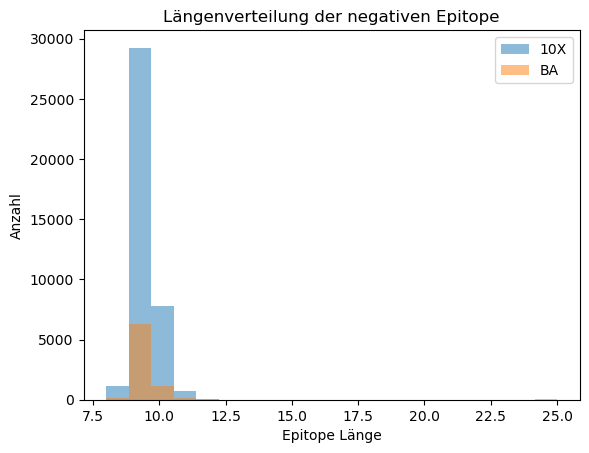

In [14]:
#Verteilung der Eigenschaften von Epitopen (z. B. Längenverteilung, Sequenzzusammensetzung) in beiden Gruppen analysieren
base_path = 'data_10x/splitted_datasets/allele/paired/test.tsv'
test_df = pd.read_csv(base_path, sep='\t')

import matplotlib.pyplot as plt

# Längenvergleich: Berechnen der Längen der Epitope
test_df['epitope_length'] = test_df['Epitope'].apply(len)

# Filtern nach '10X' und 'BA' basierend auf der vorhandenen 'source'-Spalte
negative_10x = test_df[test_df['source'] == "10X"]
negative_ba = test_df[test_df['source'] == "BA"]

# Erstellen des Histogramms
plt.hist(negative_10x['epitope_length'], bins=20, alpha=0.5, label='10X')
plt.hist(negative_ba['epitope_length'], bins=20, alpha=0.5, label='BA')
plt.legend()
plt.title('Längenverteilung der negativen Epitope')
plt.xlabel('Epitope Länge')
plt.ylabel('Anzahl')
plt.show()

## TPP4 Analyse

In [23]:
base_path = 'data_10x/splitted_datasets/allele/paired/test.tsv'
test_df = pd.read_csv(base_path, sep='\t')

pd.set_option('display.max_rows', None)
tpp4_test = test_df[test_df['task'] == "TPP4"]
tpp4_selected_columns = tpp4_test[['Binding', 'task', 'source']]
print(tpp4_selected_columns)


       Binding  task source
509          0  TPP4     BA
960          0  TPP4     BA
1413         0  TPP4     BA
2512         0  TPP4     BA
3070         0  TPP4     BA
3988         0  TPP4     BA
4013         0  TPP4     BA
5794         0  TPP4     BA
6173         0  TPP4     BA
6181         0  TPP4     BA
6193         0  TPP4     BA
6703         0  TPP4     BA
7251         0  TPP4     BA
8177         0  TPP4     BA
8373         0  TPP4     BA
9454         0  TPP4     BA
10376        0  TPP4     BA
10432        0  TPP4     BA
11402        0  TPP4     BA
12567        0  TPP4     BA
12872        0  TPP4     BA
12919        0  TPP4     BA
13175        0  TPP4     BA
14479        0  TPP4     BA
15184        0  TPP4     BA
15846        0  TPP4     BA
16299        0  TPP4     BA
16693        0  TPP4     BA
18769        0  TPP4     BA
18926        0  TPP4     BA
19190        0  TPP4     BA
19274        0  TPP4     BA
19817        0  TPP4     BA
20236        0  TPP4     BA
20568        0  TPP4

## Datenanalyse für Arbeit

In [2]:
import pandas as pd
import os

def load_dataset(base_path):
    # base_path ohne Slash am Ende, z.B. "data_10x/splitted_datasets/gene/paired"
    files = {
        'Train': os.path.join(base_path, 'train.tsv'),
        'Test': os.path.join(base_path, 'test.tsv'),
        'Validation': os.path.join(base_path, 'validation.tsv')
    }
    data = {}
    for subset, fpath in files.items():
        if os.path.exists(fpath):
            df = pd.read_csv(fpath, sep="\t")
        else:
            # Falls ein File fehlt, leeres DataFrame anlegen
            df = pd.DataFrame(columns=['Epitope'])
        data[subset] = df
    return data

def count_pos_neg(df):
    # positiv definiert als: Epitope ist nicht leer oder NaN
    df = df.fillna('')
    pos_count = sum(df['Epitope'].apply(lambda x: x.strip() != ''))
    total = len(df)
    neg_count = total - pos_count
    return pos_count, neg_count, total

# Kombinations-Definitionen:
# Pfade für jede Kombination
paths = {
    'Paired Gene':    "data_10x/splitted_datasets/gene/paired",
    'Paired Allele':  "data_10x/splitted_datasets/allele/paired",
    'Beta Gene':      "data_10x/splitted_datasets/gene/beta",
    'Beta Allele':    "data_10x/splitted_datasets/allele/beta"
}

# Wir erstellen eine Hilfsfunktion, die für eine gegebene Kombination (z.B. 'Paired Gene')
# die Counts für Train, Test, Validation sowie alle zusammen berechnet.
def get_counts_for_combination(label, base_path):
    data = load_dataset(base_path)
    subsets = ['Train', 'Validation', 'Test']
    # Gesamt zusammenführen für die Spalte "label" (ohne Suffix)
    df_all = pd.concat(data.values(), ignore_index=True) if data else pd.DataFrame(columns=['Epitope'])
    pos_all, neg_all, tot_all = count_pos_neg(df_all)

    # Einzelcounts
    results = {}
    pos_train, neg_train, tot_train = count_pos_neg(data['Train'])
    pos_val, neg_val, tot_val = count_pos_neg(data['Validation'])
    pos_test, neg_test, tot_test = count_pos_neg(data['Test'])

    # Prozentwerte berechnen
    def pct(part, whole):
        return (part / whole * 100) if whole > 0 else 0.0

    # Dictionary der Werte im Format:
    # label, label Test, label Validation, label Train
    # wir geben einen dict zurück, damit wir später alles ins DF packen können.
    results[f"{label}"] = {
        'rows positive only': pos_all,
        'rows positive only (%)': pct(pos_all, tot_all),
        'rows negative only': neg_all,
        'rows negative only (%)': pct(neg_all, tot_all),
        'rows all': tot_all
    }
    results[f"{label} Test"] = {
        'rows positive only': pos_test,
        'rows positive only (%)': pct(pos_test, tot_test),
        'rows negative only': neg_test,
        'rows negative only (%)': pct(neg_test, tot_test),
        'rows all': tot_test
    }
    results[f"{label} Validation"] = {
        'rows positive only': pos_val,
        'rows positive only (%)': pct(pos_val, tot_val),
        'rows negative only': neg_val,
        'rows negative only (%)': pct(neg_val, tot_val),
        'rows all': tot_val
    }
    results[f"{label} Train"] = {
        'rows positive only': pos_train,
        'rows positive only (%)': pct(pos_train, tot_train),
        'rows negative only': neg_train,
        'rows negative only (%)': pct(neg_train, tot_train),
        'rows all': tot_train
    }

    return results

# Wir wollen am Ende eine Tabelle erstellen, die so aussieht wie der Nutzer es vorgibt:
# 
# 	Paired Gene	Paired Gene Test	Paired Gene Validation	Paired Gene Train	Paired Allele	Paired Allele Test	Paired Allele Validation	Paired Allele Train
# rows positive only								
# rows positive only (%)	 							
# rows negative only								
# rows negative only (%)								
# rows all								
# 	Beta Gene	Beta Gene Test	Beta Gene Validation	Beta Gene Train	Beta Allele	Beta Allele Test	Beta Allele Validation	Beta Allele Train
# rows positive only								
# rows positive only (%)								
# rows negative only								
# rows negative only (%)								
# rows all

# Wir berechnen zuerst alle Ergebnisse und packen sie dann in einen DataFrame.
all_results = {}
# Reihenfolge laut Vorgabe
order = [
    'Paired Gene', 'Paired Gene Test', 'Paired Gene Validation', 'Paired Gene Train',
    'Paired Allele', 'Paired Allele Test', 'Paired Allele Validation', 'Paired Allele Train',
    'Beta Gene', 'Beta Gene Test', 'Beta Gene Validation', 'Beta Gene Train',
    'Beta Allele', 'Beta Allele Test', 'Beta Allele Validation', 'Beta Allele Train'
]

# Holen wir die Daten für die einzelnen Gruppen:
paired_gene_results = get_counts_for_combination('Paired Gene', paths['Paired Gene'])
paired_allele_results = get_counts_for_combination('Paired Allele', paths['Paired Allele'])
beta_gene_results = get_counts_for_combination('Beta Gene', paths['Beta Gene'])
beta_allele_results = get_counts_for_combination('Beta Allele', paths['Beta Allele'])

# Kombinieren
combined_results = {**paired_gene_results, **paired_allele_results, **beta_gene_results, **beta_allele_results}

# Jetzt erstellen wir den DataFrame:
rows_index = [
    'rows positive only',
    'rows positive only (%)',
    'rows negative only',
    'rows negative only (%)',
    'rows all'
]

df = pd.DataFrame(index=rows_index, columns=order)

for col in order:
    if col in combined_results:
        for r in rows_index:
            df.loc[r, col] = combined_results[col][r]
    else:
        # Falls es keine Daten gibt (sollte nicht passieren), füllen wir mit NaN
        df.loc[:, col] = pd.NA

print(df)


                       Paired Gene Paired Gene Test Paired Gene Validation  \
rows positive only          153634            43118                  43111   
rows positive only (%)       100.0            100.0                  100.0   
rows negative only               0                0                      0   
rows negative only (%)         0.0              0.0                    0.0   
rows all                    153634            43118                  43111   

                       Paired Gene Train Paired Allele Paired Allele Test  \
rows positive only                 67405        166362              46678   
rows positive only (%)             100.0         100.0              100.0   
rows negative only                     0             0                  0   
rows negative only (%)               0.0           0.0                0.0   
rows all                           67405        166362              46678   

                       Paired Allele Validation Paired Allele Train 